# Cryptocurrency Trading 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time

import pandas as pd
import requests
import numpy as np
import seaborn as sns

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import layout
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure
from bokeh.models import LinearAxis, Range1d, DataRange1d

from sources.bitfinex import *


output_notebook()

The API clients available in this package are deprecated and will be no longer available in their current form starting with version 2.0!


Loading BokehJS ...

In [4]:
# Crypto Intro
# Trading spiel for crypto
# API spiel

In [5]:
resp = requests.get('https://min-api.cryptocompare.com/data/top/totalvol?limit=10&tsym=USD')
top_coins = [r['CoinInfo']['Name'] for r in resp.json()['Data']]

In [6]:
def get_price_data(coin_name, cross='USD', freq='hour', limit=1000):
    url = f'https://min-api.cryptocompare.com/data/histo{freq}?fsym={coin_name}&tsym={cross}&limit={limit}'
    print(url)
    resp = requests.get(url)
    return pd.DataFrame(resp.json()['Data']).assign(coin=coin_name)

btc = get_price_data('BTC')
btc.head()

https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=1000


,close,high,low,open,time,volumefrom,volumeto,coin
0,6767.56,6788.42,6740.56,6747.47,1528812000,2436.56,16530614.16,BTC
1,6767.91,6772.99,6755.91,6767.60,1528815600,1312.65,8946884.00,BTC
2,6750.01,6775.75,6707.12,6767.85,1528819200,3543.61,23958995.53,BTC
3,6733.98,6759.62,6729.66,6750.01,1528822800,1923.36,13027553.37,BTC
4,6700.73,6741.98,6683.79,6733.98,1528826400,4543.19,30543790.44,BTC


In [7]:
raw = pd.concat([
    get_price_data(coin, limit=500) for coin in top_coins
])

https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=ETH&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=EOS&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=BCH&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=LTC&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=ETC&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=CET&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=XRP&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=TRX&tsym=USD&limit=500
https://min-api.cryptocompare.com/data/histohour?fsym=ADA&tsym=USD&limit=500


In [8]:
raw.head()

,close,high,low,open,time,volumefrom,volumeto,coin
0,6575.58,6624.65,6539.39,6624.62,1530612000,6695.63,44110848.28,BTC
1,6584.21,6596.59,6559.51,6578.62,1530615600,2261.18,14918715.13,BTC
2,6583.81,6584.83,6569.65,6584.22,1530619200,1518.09,10053070.21,BTC
3,6572.81,6585.95,6557.05,6583.76,1530622800,2134.81,14095601.11,BTC
4,6584.52,6586.80,6563.25,6572.98,1530626400,1629.30,10759208.68,BTC


In [9]:
prices = raw.set_index(['coin', 'time'])['close'].unstack(level='coin')

In [10]:
correlations = prices.corr()

In [11]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

(
    correlations
    .style
    .background_gradient(cmap, axis=1)\
    .set_properties(**{'font-size': '10pt', 'width': '20'})\
    .set_caption("Crypocurrency Correlations")\
    .set_precision(2)\
)

coin,ADA,BCH,BTC,CET,EOS,ETC,ETH,LTC,TRX,XRP
coin,,,,,,,,,,
ADA,1,0.94,0.91,0.54,0.56,0.13,0.61,0.82,0.57,0.48
BCH,0.94,1,0.85,0.46,0.65,0.28,0.77,0.9,0.68,0.65
BTC,0.91,0.85,1,0.47,0.43,0.051,0.49,0.67,0.36,0.28
CET,0.54,0.46,0.47,1,-0.26,-0.29,-0.033,0.13,-0.15,-0.19
EOS,0.56,0.65,0.43,-0.26,1,0.62,0.87,0.88,0.94,0.89
ETC,0.13,0.28,0.051,-0.29,0.62,1,0.76,0.45,0.6,0.68
ETH,0.61,0.77,0.49,-0.033,0.87,0.76,1,0.87,0.88,0.9
LTC,0.82,0.9,0.67,0.13,0.88,0.45,0.87,1,0.9,0.86
TRX,0.57,0.68,0.36,-0.15,0.94,0.6,0.88,0.9,1,0.96


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
x = 'ETH'
y = 'EOS'

In [14]:
x_df = get_price_data(x)
y_df = get_price_data(y)

https://min-api.cryptocompare.com/data/histohour?fsym=ETH&tsym=USD&limit=1000
https://min-api.cryptocompare.com/data/histohour?fsym=EOS&tsym=USD&limit=1000


In [15]:
model_data = pd.concat([
    x_df.set_index('time')[['close']].rename({'close': x}, axis=1),
    y_df.set_index('time')[['close']].rename({'close': y}, axis=1),
], axis=1)

model_data.head()    

,ETH,EOS
time,,
1528812000,524.74,10.63
1528815600,524.82,10.71
1528819200,519.57,10.50
1528822800,515.77,10.47
1528826400,507.13,10.30


In [16]:
model = LinearRegression()

X=model_data[[x]]
Y=model_data[y]

model.fit(X=X, y=Y)
'Model score: {0:0.2f}'.format(model.score(X, Y))

/Users/bmcelroy/anaconda3/envs/stem_crypto/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


'Model score: 0.81'

Text(0.5,1,'EOS Predicted')

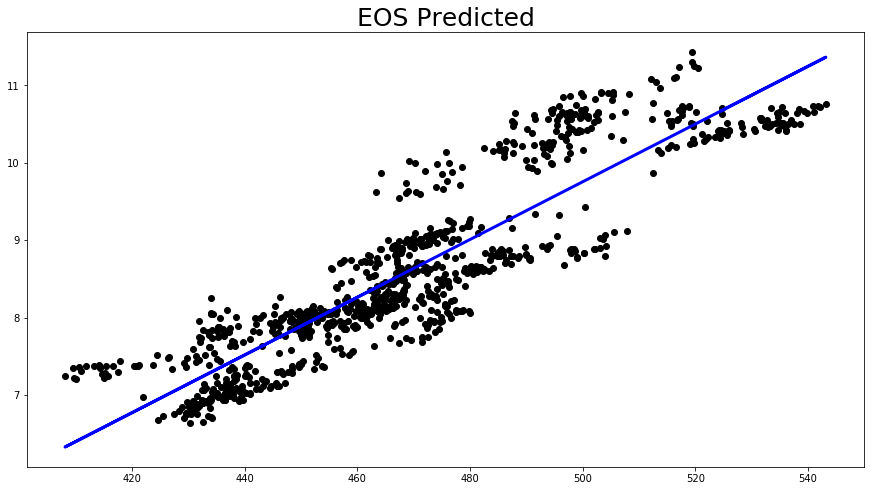

In [17]:
pred = model.predict(X)

fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X, Y,  color='black')
plt.plot(X, pred, color='blue', linewidth=3)
ax.set_title('%s Predicted' % y, fontdict={'size': 25})

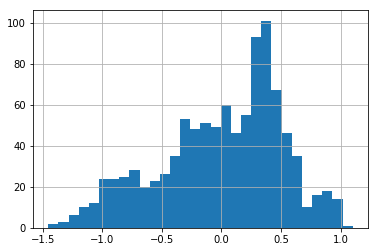

In [18]:
residuals = model.predict(model_data[[x]]) - model_data[y]
residuals.hist(bins=30)

In [19]:
x = 'ETH'
y = 'EOS'

In [20]:
pairs = [
    '%sUSD' % x, 
    '%sUSD' % y,
]
print(pairs)
connect_ws(pairs=pairs)

['ETHUSD', 'EOSUSD']


In [22]:
trades = get_latest_trade_ticks()
assert trades.shape

In [23]:
def annotate_model(df, model, x, y):
    df.loc[:, '%s_Pred' % y] = model.predict(df[['%sUSD' % x]])
    df.loc[:, 'Residual'] = df['%s_Pred' % y] - df['%sUSD' % y]
    return df

In [24]:
data = annotate_model(df=trades, model=model, x=x, y=y)

In [25]:
data.head()

symbol,EOSUSD,ETHUSD,EOS_Pred,Residual
timestamp,,,,
2018-07-24 16:49:52.917000+10:00,8.126,465.45,8.466017,0.340017
2018-07-24 16:49:53.576000+10:00,8.126,465.45,8.466017,0.340017
2018-07-24 16:49:53.578000+10:00,8.126,465.45,8.466017,0.340017
2018-07-24 16:49:54.507000+10:00,8.126,465.45,8.466017,0.340017
2018-07-24 16:49:55.805000+10:00,8.126,465.45,8.466017,0.340017


In [26]:
import math
from scipy.stats import percentileofscore

def desired_position(x, base=5):
    return -int(base * math.floor(float(x)/base)) / base


def annotate_trades(data, x,  y):
    data.loc[:, 'Percentile'] = [percentileofscore(residuals, x) for x in data['Residual']]
    data.loc[:, 'DesiredPosition'] = [desired_position(x) for x in (data['Percentile'] - 50)]
    data.loc[:, 'Trade'] = data['DesiredPosition'].diff().fillna(0)
    data.loc[:, 'Buys_y'] = (data['Trade'] > 0).astype(int).replace(0, np.nan) * data['%sUSD' % y]
    data.loc[:, 'Sells_y'] = (data['Trade'] < 0).astype(int).replace(0, np.nan) * data['%sUSD' % y]
    data.loc[:, 'Buys_x'] = (data['Trade'] > 0).astype(int).replace(0, np.nan) * data['%sUSD' % x]
    data.loc[:, 'Sells_x'] = (data['Trade'] < 0).astype(int).replace(0, np.nan) * data['%sUSD' % x]
    
    return data

In [27]:
data = annotate_trades(data, x, y)

In [28]:
source = ColumnDataSource(data)

In [29]:
data.head()

symbol,EOSUSD,ETHUSD,EOS_Pred,Residual,Percentile,DesiredPosition,Trade,Buys_y,Sells_y,Buys_x,Sells_x
timestamp,,,,,,,,,,,
2018-07-24 16:49:52.917000+10:00,8.126,465.45,8.466017,0.340017,69.93007,-3.0,0.0,NaN,NaN,NaN,NaN
2018-07-24 16:49:53.576000+10:00,8.126,465.45,8.466017,0.340017,69.93007,-3.0,0.0,NaN,NaN,NaN,NaN
2018-07-24 16:49:53.578000+10:00,8.126,465.45,8.466017,0.340017,69.93007,-3.0,0.0,NaN,NaN,NaN,NaN
2018-07-24 16:49:54.507000+10:00,8.126,465.45,8.466017,0.340017,69.93007,-3.0,0.0,NaN,NaN,NaN,NaN
2018-07-24 16:49:55.805000+10:00,8.126,465.45,8.466017,0.340017,69.93007,-3.0,0.0,NaN,NaN,NaN,NaN


In [30]:
# Target crypto prices
y_fig = figure(x_axis_type="datetime", plot_width=500, plot_height=600, title=y)
y_fig.line(x='timestamp', y='%sUSD' % y, line_color="blue", source=source, legend=y)

# Predicted Plot
# price_fig.line(x='timestamp', y='%s_Pred' % y, source=source, line_color="blue",line_dash='dashed', legend='Pred')

# Input crypto prices
x_fig = figure(x_axis_type="datetime", plot_width=500, plot_height=600, title=x)
x_fig.line(x='timestamp', y='%sUSD' % x, line_color="blue", source=source, legend=x)

# Residual plot
residual_fig = figure(x_axis_type="datetime", plot_width=1000, plot_height=200, title='Percentile')
residual_fig.title.align = 'center'
residual_fig.line(x='timestamp', y='Percentile', line_color="black", source=source)

# Trades
y_fig.triangle(
    x='timestamp', y='Buys_y' , source=source, fill_color='Green', size=10, legend='Buys '
)
y_fig.triangle(
    x='timestamp', y='Sells_y' , source=source, fill_color='Red', size=10, 
    legend='Sells ', angle=math.pi,
)
x_fig.triangle(
    x='timestamp', y='Buys_x' , source=source, fill_color='Green', size=10, legend='Buys '
)
x_fig.triangle(
    x='timestamp', y='Sells_x' , source=source, fill_color='Red', size=10, 
    legend='Sells ', angle=math.pi,
)

target = show(
    layout([[y_fig, x_fig], [residual_fig]]), 
notebook_handle=True)

In [ ]:
# Update plot

base_df = pd.DataFrame(columns=pairs, index=pd.DatetimeIndex([], name='timestamp'))
prev_trades = trades[pairs].iloc[-1:]

while True:
    trades = get_latest_trade_ticks()
    trades = base_df.append(trades, sort=True)
    
    last_timestamp = pd.to_datetime(source.data['timestamp'].max()).tz_localize('UTC').tz_convert('Australia/Sydney')
    
    if trades is not None and not trades.empty:
        trades = trades[trades.index > last_timestamp]
        trades = prev_trades.append(trades, sort=True).fillna(method='ffill').iloc[1:]
        if trades.dropna(how='any').empty:
            continue
        data = annotate_model(df=trades, model=model, x=x, y=y)
        data = annotate_trades(data, x=x, y=y)
        
        source.stream(data)
        if not trades.empty:
            prev_last = trades[pairs].iloc[-1:]
        
    push_notebook(handle=target)
    time.sleep(1)

In [34]:
df = pd.DataFrame(source.data)

In [39]:
df

,EOSUSD,ETHUSD,EOS_Pred,Residual,Percentile,DesiredPosition,Trade,Buys_y,Sells_y,Buys_x,Sells_x,timestamp
0,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:52.917
1,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:53.576
2,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:53.578
3,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:54.507
4,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:55.805
5,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:59.415
6,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:49:59.466
7,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:50:00.848
8,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:50:01.442
9,8.1260,465.450000,8.466017,0.340017,69.930070,-3.0,0.0,NaN,NaN,NaN,NaN,2018-07-24 06:50:01.473
